In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from random import uniform
from numba import jit, prange

## Вычисление числа π. Метод Монте-Карло

***Примечание 1.*** Площадь единичного круга, то есть круга с радиусом, равным \\(R = 1\\)  равна \\(S = πR^2 = π\\) .

***Примечание 2.*** Уравнение единичной окружности имеет вид \\(x^2 + y^2 = 1\\) .

***Примечание 3.*** 

\\[\frac{Sкр}{Sкв} = \frac{πR^2}{a^2}\\]
\\[Sкр * a^2 = Sкв * πR^2\\]
\\[π= \frac{Sкр}{Sкв * R^2} * a^2\\]
, где \\[\frac{Sкр}{Sкв * R^2} = \frac{Sкр}{Sкв}\\]
, где \\[\frac{Sкр}{Sкв} = Количество\spaceточек\spaceв\spaceкругу \div Общее\spaceколичество\spaceточек\\]
\\(=>\\)
\\[π=  Количество\spaceточек\spaceв\spaceкругу \div Общее\spaceколичество\spaceточек * a^2\\ ,
a = 2\\]


In [ ]:
@jit(nopython=True)
def calculation():

    n = 10 ** 8  # количество бросков
    numb_points = 0  # количество точек попавших в окружность
    pi_values = []  # список для хранения значений π
    numb_pi = 0  # счетчик для сбора значений

    # Выполняем броски
    for i in range(1, n + 1):
        x = uniform(-1, 1)
        y = uniform(-1, 1)
        numb_pi += 1
        if x ** 2 + y ** 2 <= 1:
            numb_points += 1

        if numb_pi % 1000 == 0:
            pi_values.append((numb_points / i) * 4)
    # Создаем последовательность для оси x, соответствующую количеству записей в pi_values
    x_values = np.arange(1000, n + 1, 1000)
    return x_values, pi_values


In [35]:
# Функция для построения графика
def plotting(x_values, pi_values):
    plt.plot(x_values, pi_values, color='red')
    plt.axhline(y=np.pi, color='blue', linestyle='--', label='Истинное значение π')
    plt.title('Приближение числа π')
    plt.xlabel('Количество бросков')
    plt.ylabel('Значение π')
    plt.legend()
    plt.show()


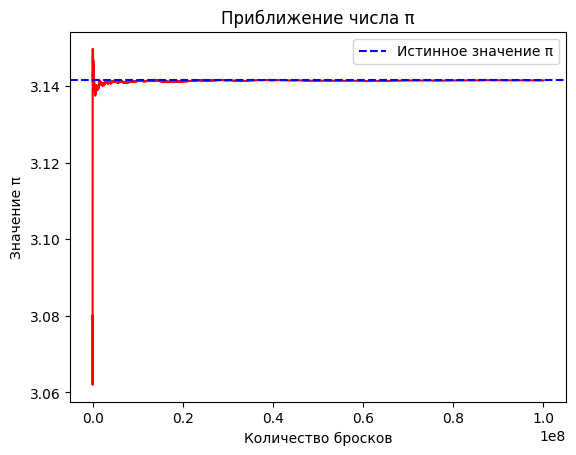

In [36]:
x_values, pi_values = calculation()
plotting(x_values, pi_values)

## Вычисление вероятности перколяции

In [3]:
@jit(nopython=True)
def DFS(field, x, y):
    if (x < 0 or x >= len(field) or y < 0 or y >= len(field[0]) or field[x][y] != 0): return False

    field[x][y] = 1
    
    if x == len(field) - 1 : return True
    
    if (DFS(field, x + 1, y) or DFS(field, x - 1, y) or DFS(field, x, y + 1) or DFS(field, x, y - 1)) : return True

    return False

In [4]:
def plotting(plist, p_percolation):
    plt.plot(plist, p_percolation, color = 'red')
    plt.title('Зависимость вероятности перколяции от вероятности проходимости каждой клетки')
    plt.xlabel('Вероятность проходимости каждой клетки')
    plt.ylabel('Вероятность перколяции')
    plt.show()

In [5]:
@jit(nopython=True)
def calculation():
    w = 32  # ширина прямоугольного поля
    h = 32  # высота прямоугольного поля
    plist = [i/10 for i in range(2,10)]  # вероятности того, что любая отдельная клетка будет проходимой
    N = 100000  # количество экспериментов
    p_percolation = [] # доля удачных экспериментов, (экспериментов в которых возможна перкаляция)


    for p in plist:
        countp_nice_tries = 0
        for _ in range(N):
            
            # генерируем матрицу, каждая ячейка которой представляет вероятность каждой отдельной клетки поля быть закрашенной
            field_p = [[uniform(0, 1) for _ in range(w)] for _ in range(h)]
            field = [[0 if value <= p else 1 for value in row] for row in field_p]

            flag_percolation = False
            for j in range(w):
                if field[0][j] == 0:
                    if DFS(field,0,j):
                        flag_percolation = True
                        break
            if flag_percolation : countp_nice_tries +=1
        p_percolation.append(countp_nice_tries/N)
    return plist, p_percolation

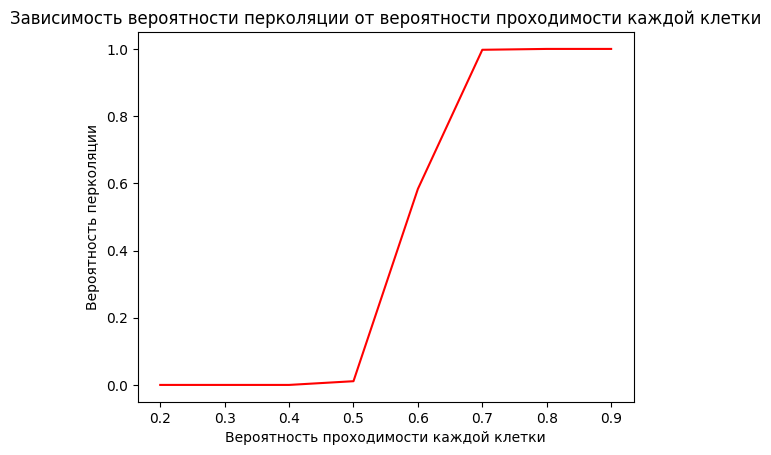

In [6]:
plist, p_percolation = calculation()
plotting(plist, p_percolation)
